# Campaign Analysis: AB Test

#### Scenario
The marketing team just finished collecting 30 days of data testing a new advertising campaign against our old campaign.  
We're tasked with analyzing the results of the campaign and sharing our findings.

#### Questions to answer:
1. Is the test campaign more effective at converting customers?  
2. Is the test campaign more cost efficient?  
3. What is the main takeaway from these results? 
3. What are the recommended next steps?

In [94]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [95]:
# loading in control and test data
control=pd.read_csv('control_group.csv', delimiter=';')
test=pd.read_csv('test_group.csv', delimiter=';')

In [96]:
# checking imported data
control.head(10)

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0
6,Control Campaign,7.08.2019,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0
7,Control Campaign,8.08.2019,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0
8,Control Campaign,9.08.2019,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0
9,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0


In [97]:
# reformatting date to yyyy-mm-dd
control['Date'] = pd.to_datetime(control['Date'], dayfirst=True)

In [98]:
# checking the shape of the data frame
control.shape

(30, 10)

The column names aren't following good naming conventions so I improved them.

In [99]:
# changing control column names
def clean(val):
    return val.strip().lower().replace('# ', '').replace('of ', '').replace(' ', '_').replace("[usd]", "usd")

control.rename(columns=clean, inplace=True)
control.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase
0,Control Campaign,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2019-08-02,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,2019-08-03,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,2019-08-04,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,2019-08-05,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
# checking for null values
control.isnull().sum()

campaign_name     0
date              0
spend_usd         0
impressions       1
reach             1
website_clicks    1
searches          1
view_content      1
add_to_cart       1
purchase          1
dtype: int64

I found that the control group has one row with null values. I decided to review each column to decided whether to replace them (Mean, Median or Mode) or drop them from data frame. 

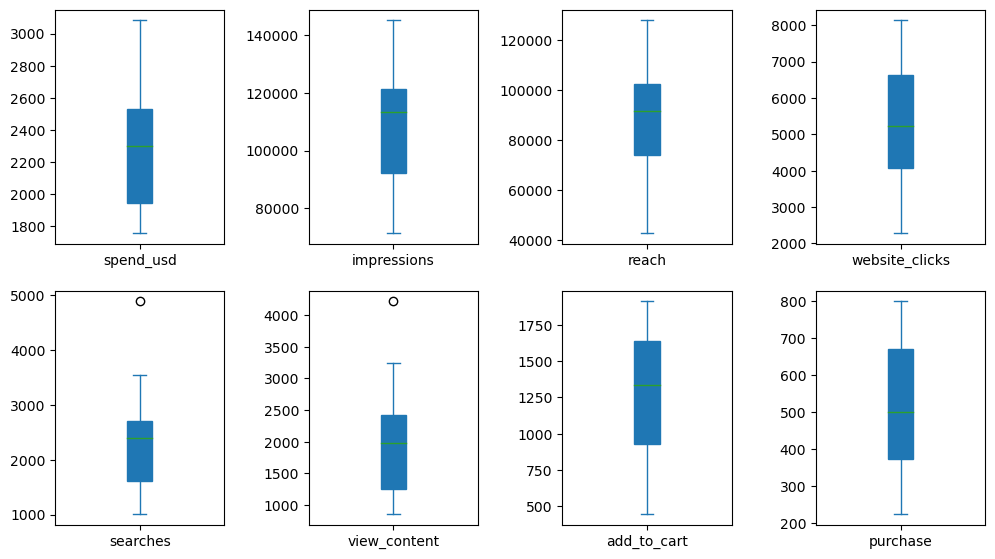

In [101]:
# boxplots for control group columns
control.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

In [102]:
# filling in null values
control['spend_usd'] = control['spend_usd'].fillna(value=control['spend_usd'].mean()).round(1)

control['impressions'] = control['impressions'].fillna(value=control['impressions'].mean()).round(1)

control['reach'] = control['reach'].fillna(value=control['reach'].mean()).round(1)

control['website_clicks'] = control['website_clicks'].fillna(value=control['website_clicks'].mean()).round(1)

control['searches'] = control['searches'].fillna(value=control['searches'].median()).round(1)

control['view_content'] = control['view_content'].fillna(value=control['view_content'].median()).round(1)

control['add_to_cart'] = control['add_to_cart'].fillna(value=control['add_to_cart'].mean()).round(1)

control['purchase'] = control['purchase'].fillna(value=control['purchase'].mean()).round(1)


In [103]:
# checking to see null values gone
control.isnull().sum()

campaign_name     0
date              0
spend_usd         0
impressions       0
reach             0
website_clicks    0
searches          0
view_content      0
add_to_cart       0
purchase          0
dtype: int64

In [104]:
# double checking filled values
control.head(10)

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase
0,Control Campaign,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2019-08-02,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,2019-08-03,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,2019-08-04,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,2019-08-05,1835,109559.8,88844.9,5320.8,2390.0,1984.0,1300.0,522.8
5,Control Campaign,2019-08-06,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0
6,Control Campaign,2019-08-07,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0
7,Control Campaign,2019-08-08,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0
8,Control Campaign,2019-08-09,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0
9,Control Campaign,2019-08-10,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0


In [105]:
# validating test data
test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [106]:
# checking the shape of the data frame
test.shape

(30, 10)

In [107]:
# checking for null values
test.isnull().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64

In [108]:
# reformatting date to yyyy-mm-dd
test['Date'] = pd.to_datetime(test['Date'], dayfirst=True)
test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,2019-08-01,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2019-08-02,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,2019-08-03,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,2019-08-04,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,2019-08-05,2297,114295,95138,5863,2106,858,956,768


In [109]:
# changing test column names
def cleantest(valt):
    return valt.strip().lower().replace('# ', '').replace('of ', '').replace(' ', '_').replace("[usd]", "usd")

test.rename(columns=clean, inplace=True)
test.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase
0,Test Campaign,2019-08-01,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2019-08-02,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,2019-08-03,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,2019-08-04,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,2019-08-05,2297,114295,95138,5863,2106,858,956,768


In [110]:
# creating KPIs for test group
control['CTR'] = control['website_clicks']/control['impressions']
control['CR'] = control['purchase']/control['website_clicks']
control['CPC'] = control['spend_usd']/control['website_clicks']
control['CPA'] = control['spend_usd']/control['purchase']

control.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase,CTR,CR,CPC,CPA
0,Control Campaign,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,0.084835,0.088084,0.324971,3.689320
1,Control Campaign,2019-08-02,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,0.067003,0.063009,0.216646,3.438356
2,Control Campaign,2019-08-03,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,0.049411,0.057160,0.360018,6.298387
3,Control Campaign,2019-08-04,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,0.042057,0.110930,0.632953,5.705882
4,Control Campaign,2019-08-05,1835,109559.8,88844.9,5320.8,2390.0,1984.0,1300.0,522.8,0.048565,0.098256,0.344873,3.509946


In [111]:
# creating KPIs for test group
test['CTR'] = test['website_clicks']/test['impressions']
test['CR'] = test['purchase']/test['website_clicks']
test['CPC'] = test['spend_usd']/test['website_clicks']
test['CPA'] = test['spend_usd']/test['purchase']

test.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase,CTR,CR,CPC,CPA
0,Test Campaign,2019-08-01,3008,39550,35820,3038,1946,1069,894,255,0.076814,0.083937,0.990125,11.796078
1,Test Campaign,2019-08-02,2542,100719,91236,4657,2359,1548,879,677,0.046238,0.145373,0.545845,3.754801
2,Test Campaign,2019-08-03,2365,70263,45198,7885,2572,2367,1268,578,0.112221,0.073304,0.299937,4.091696
3,Test Campaign,2019-08-04,2710,78451,25937,4216,2216,1437,566,340,0.053741,0.080645,0.642789,7.970588
4,Test Campaign,2019-08-05,2297,114295,95138,5863,2106,858,956,768,0.051297,0.130991,0.391779,2.990885


In [112]:
# Cominbing data for later use
combined = pd.concat([control,test])
combined = combined.reset_index()
combined.shape

(60, 15)

In [113]:
combined.head()

,index,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase,CTR,CR,CPC,CPA
0,0,Control Campaign,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,0.084835,0.088084,0.324971,3.689320
1,1,Control Campaign,2019-08-02,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,0.067003,0.063009,0.216646,3.438356
2,2,Control Campaign,2019-08-03,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,0.049411,0.057160,0.360018,6.298387
3,3,Control Campaign,2019-08-04,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,0.042057,0.110930,0.632953,5.705882
4,4,Control Campaign,2019-08-05,1835,109559.8,88844.9,5320.8,2390.0,1984.0,1300.0,522.8,0.048565,0.098256,0.344873,3.509946


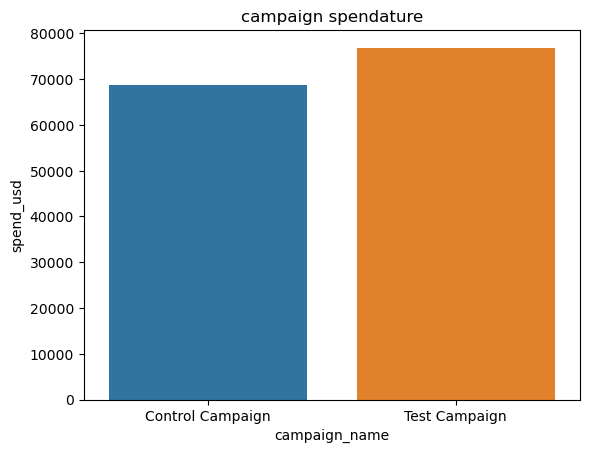

In [114]:
# Comparing campaign spendature for test and control
data_all = pd.concat([control, test])
ax = sns.barplot(data=data_all, x='campaign_name', y="spend_usd", errorbar=('ci', False), estimator='sum')
ax.set_title('campaign spendature')
plt.show()

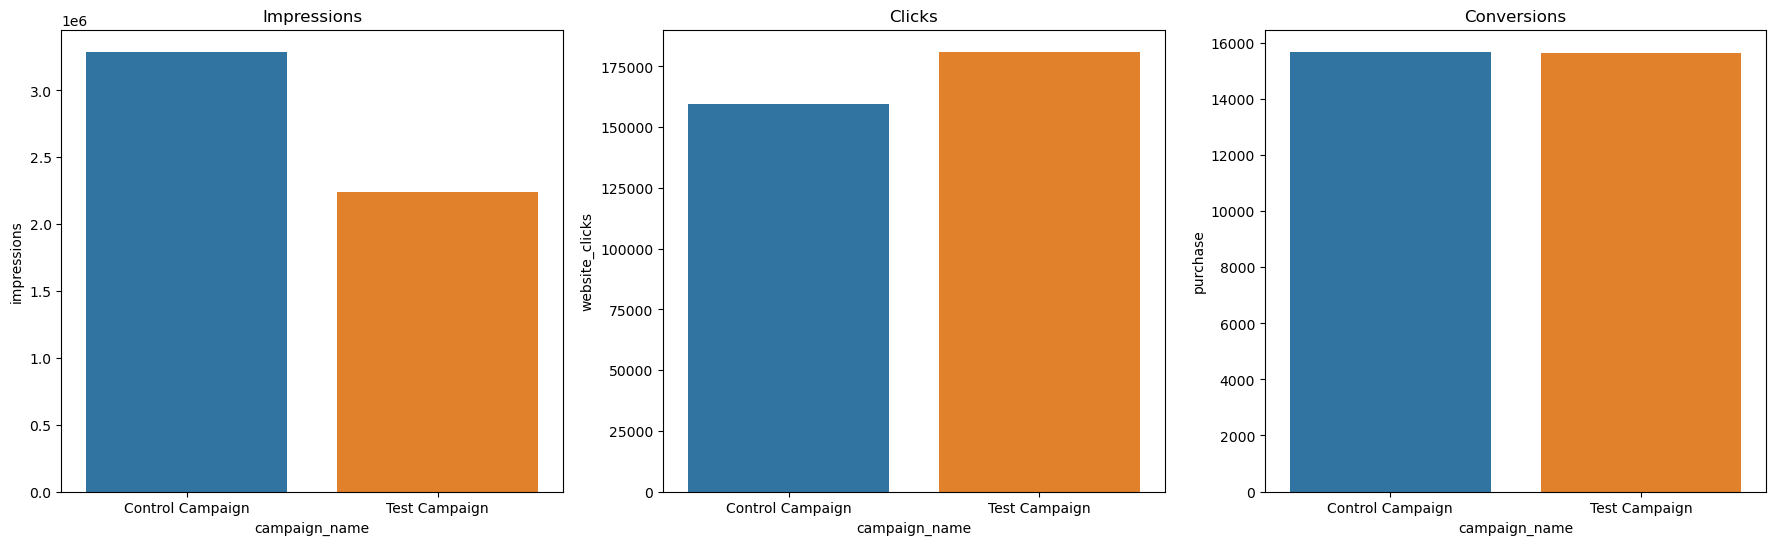

In [115]:
# Comparing impressiong, clicks, and conversions for test and control
fig, ax = plt.subplots(ncols=3, figsize=(22,6))
ax1 = sns.barplot(data=data_all, x='campaign_name', y='impressions', errorbar=('ci', False), ax=ax[0], estimator='sum')
ax2 = sns.barplot(data=data_all, x='campaign_name', y='website_clicks', errorbar=('ci', False), ax=ax[1], estimator='sum')
ax3 = sns.barplot(data=data_all, x='campaign_name', y='purchase', errorbar=('ci', False), ax=ax[2], estimator='sum')

ax1.set_title('Impressions')
ax2.set_title('Clicks')
ax3.set_title('Conversions')

plt.show()

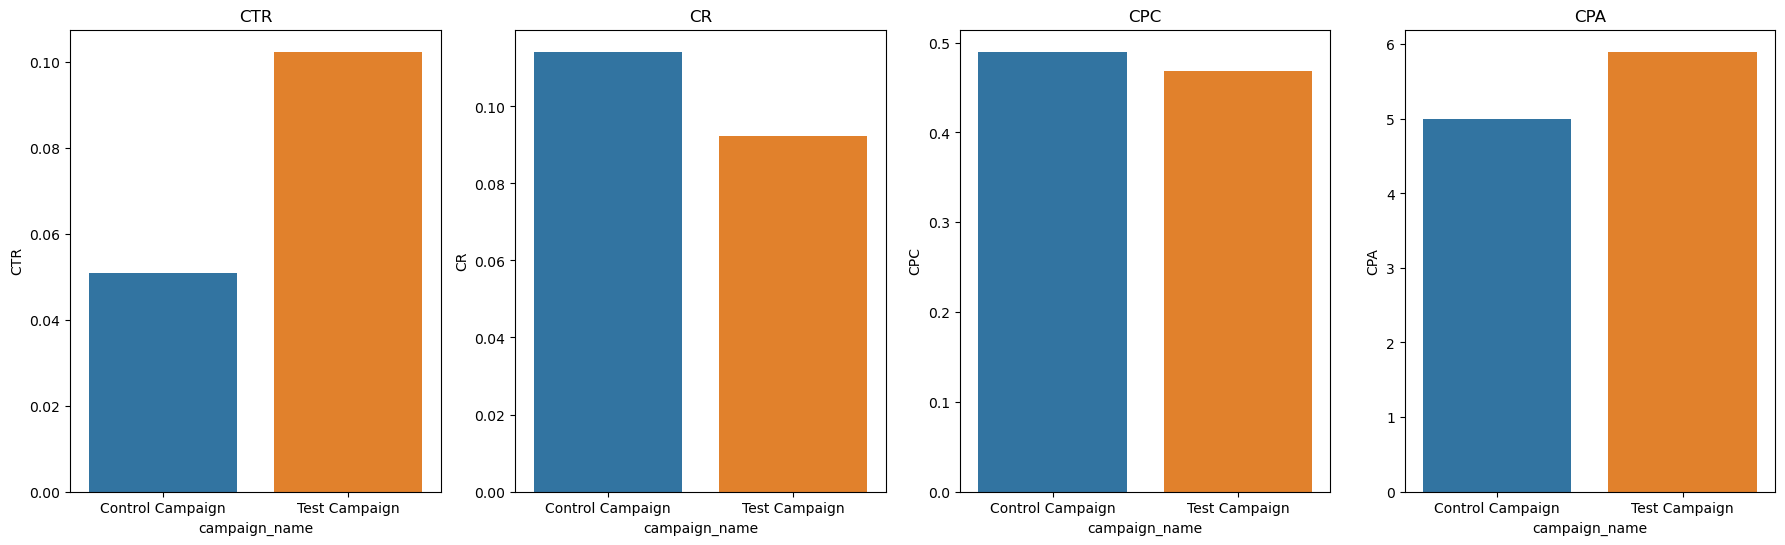

In [116]:
# Comparing CTR, CR, CPC, and CPA for test and control
fig, ax = plt.subplots(ncols=4, figsize=(22,6))
ax1 = sns.barplot(data=data_all, x='campaign_name', y='CTR', errorbar=('ci', False), ax=ax[0], estimator='mean')
ax2 = sns.barplot(data=data_all, x='campaign_name', y='CR', errorbar=('ci', False), ax=ax[1], estimator='mean')
ax3 = sns.barplot(data=data_all, x='campaign_name', y='CPC', errorbar=('ci', False), ax=ax[2], estimator='mean')
ax4 = sns.barplot(data=data_all, x='campaign_name', y='CPA', errorbar=('ci', False), ax=ax[3], estimator='mean')

ax1.set_title('CTR')
ax2.set_title('CR')
ax3.set_title('CPC')
ax4.set_title('CPA')

plt.show()

### 3. Statistical Analysis

Now that we've calculated the KPI's and visualized them, we can run hypothesis testing to see if the results are statistically signficant.

In [117]:
# Proportion confidence interval for CTR and CR
def ratio_confidence_interval(metric, measure_a, measure_b, alpha):
    control_sum_a = control[measure_a].sum()
    test_sum_a = test[measure_a].sum()
    control_sum_b = control[measure_b].sum()
    test_sum_b = test[measure_b].sum()

    p_pool = (control_sum_a + test_sum_a) / (control_sum_b + test_sum_b)
    pool_se = np.sqrt(p_pool * (1 - p_pool) * (1 / control_sum_b + 1 / test_sum_b))

    metric_diff = (test_sum_a / test_sum_b) - (control_sum_a / control_sum_b)
    margin_of_error = stats.norm.ppf(1 - alpha / 2) * pool_se

    ci_lower_bound = metric_diff - margin_of_error
    ci_upper_bound = metric_diff + margin_of_error

    print(f"The difference in {metric} between groups is {round(metric_diff, 4)}")
    print("Confidence Interval: [", round(ci_lower_bound, 4), ",", round(ci_upper_bound, 4), "]")
    print()

    if (ci_lower_bound > 0) or (ci_upper_bound < 0):
        print(f'Reject Null Hypothesis, statistically significant difference between Control and Test {metric}')
    else:
        print(f'Unable to reject Null Hypothesis, no statistically significant difference between Control and Test {metric}')

# Continuous confidence interval for CPC and CPA
def cont_confidence_interval(metric, alpha):
    control_std = control[metric].std()
    control_count = control[metric].count()
    test_std = test[metric].std()
    test_count = test[metric].count()

    se = np.sqrt((control_std ** 2 / control_count) + (test_std ** 2 / test_count))

    metric_diff = test[metric].mean() - control[metric].mean()
    margin_of_error = stats.norm.ppf(1 - alpha / 2) * se

    ci_lower_bound = metric_diff - margin_of_error
    ci_upper_bound = metric_diff + margin_of_error

    print(f"The difference in {metric} between groups is {round(metric_diff, 4)}")
    print("Confidence Interval: [", round(ci_lower_bound, 4), ",", round(ci_upper_bound, 4), "]")
    print()

    if (ci_lower_bound > 0) or (ci_upper_bound < 0):
        print(f'Reject Null Hypothesis, statistically significant difference between Control and Test {metric}')
    else:
        print(f'Unable to reject Null Hypothesis, no statistically significant difference between Control and Test {metric}')


#### CTR Hypothesis Test

In [118]:
ratio_confidence_interval(metric='CTR', 
                    measure_a='website_clicks', 
                    measure_b='impressions', 
                    alpha=.05)

The difference in CTR between groups is 0.0323
Confidence Interval: [ 0.0319 , 0.0327 ]

Reject Null Hypothesis, statistically significant difference between Control and Test CTR


#### CR Hypothesis Test

In [119]:
ratio_confidence_interval(metric='CR', 
                    measure_a='purchase', 
                    measure_b='website_clicks', 
                    alpha=.05)

The difference in CR between groups is -0.0118
Confidence Interval: [ -0.0138 , -0.0099 ]

Reject Null Hypothesis, statistically significant difference between Control and Test CR


#### CPC Hypothesis Test

In [120]:
cont_confidence_interval(metric='CPC', alpha=.05)

The difference in CPC between groups is -0.0212
Confidence Interval: [ -0.1223 , 0.0799 ]

Unable to reject Null Hypothesis, no statistically significant difference between Control and Test CPC


#### CPA Hypothesis Test

In [121]:
cont_confidence_interval(metric='CPA', alpha=.05)

The difference in CPA between groups is 0.8987
Confidence Interval: [ -0.3538 , 2.1511 ]

Unable to reject Null Hypothesis, no statistically significant difference between Control and Test CPA


  

## Conclusion:

#### Is the test campaign more effective at converting customers?
No. While the click through rate is significantly higher, the conversion rate is significantly lower.

#### Is the test campaign more cost effective?
No. There is no real difference in cost to acquire a customer.

#### What is the main takeaway from these results?
The test campaign is not a better conversion campaign than our current campaign.

#### What are the recommended next steps?
We have a few options:  
    1. We can continue running the test campaign to acquire more data  
    2. We can go back to the drawing board and run a new test campaign  
    3. We can consider using the new campaign as a brand awareness campaign  